# Feature Selection techniques or methods
    1.Filter method
    2.wrapper method
    3.Embeded method

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("mobile_train.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
X = data.iloc[:,:-1]
Y = data["price_range"]

### Univariant feature

In [4]:
from sklearn.feature_selection import SelectKBest,chi2

In [5]:
skb = SelectKBest(score_func=chi2)
skb.fit(X,Y)

SelectKBest(k=10, score_func=<function chi2 at 0x000001FC22C94828>)

In [10]:
# dir(np)

In [7]:
score = pd.Series(skb.scores_,index=X.columns).sort_values(ascending=False)

In [9]:
score.nlargest(10)

ram              931267.519053
px_height         17363.569536
battery_power     14129.866576
px_width           9810.586750
mobile_wt            95.972863
int_memory           89.839124
sc_w                 16.480319
talk_time            13.236400
fc                   10.135166
sc_h                  9.614878
dtype: float64

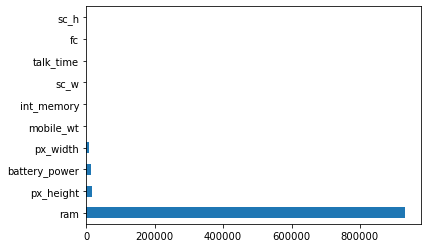

In [33]:
score.nlargest(10).plot(kind="barh")

### Feature importance

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
Etc = ExtraTreesClassifier(max_depth=2)
Etc.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=2, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [17]:
importance_score = pd.Series(Etc.feature_importances_,index=X.columns).sort_values(ascending=False)

In [18]:
# dir(Etc)

In [20]:
importance_score.nlargest(10)

ram              0.415565
px_width         0.156035
battery_power    0.131703
px_height        0.098828
mobile_wt        0.037868
m_dep            0.023106
sc_h             0.022481
touch_screen     0.018957
int_memory       0.016581
talk_time        0.015629
dtype: float64

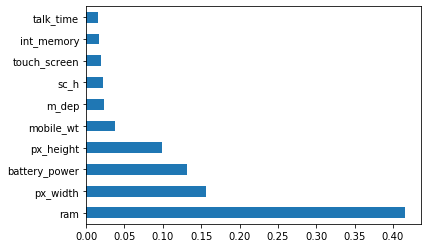

In [34]:
importance_score.nlargest(10).plot(kind="barh")

In [21]:
# ram              931267.519053
# px_height         17363.569536
# battery_power     14129.866576
# px_width           9810.586750
# mobile_wt            95.972863
# int_memory           89.839124
# sc_w                 16.480319
# talk_time            13.236400
# fc                   10.135166
# sc_h                  9.614878
# dtype: float64
    
# ram              0.415565
# px_width         0.156035
# battery_power    0.131703
# px_height        0.098828
# mobile_wt        0.037868
# m_dep            0.023106
# sc_h             0.022481
# touch_screen     0.018957
# int_memory       0.016581
# talk_time        0.015629
# dtype: float64

### Correlation

In [22]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [23]:
corr_matrix = data.corr()

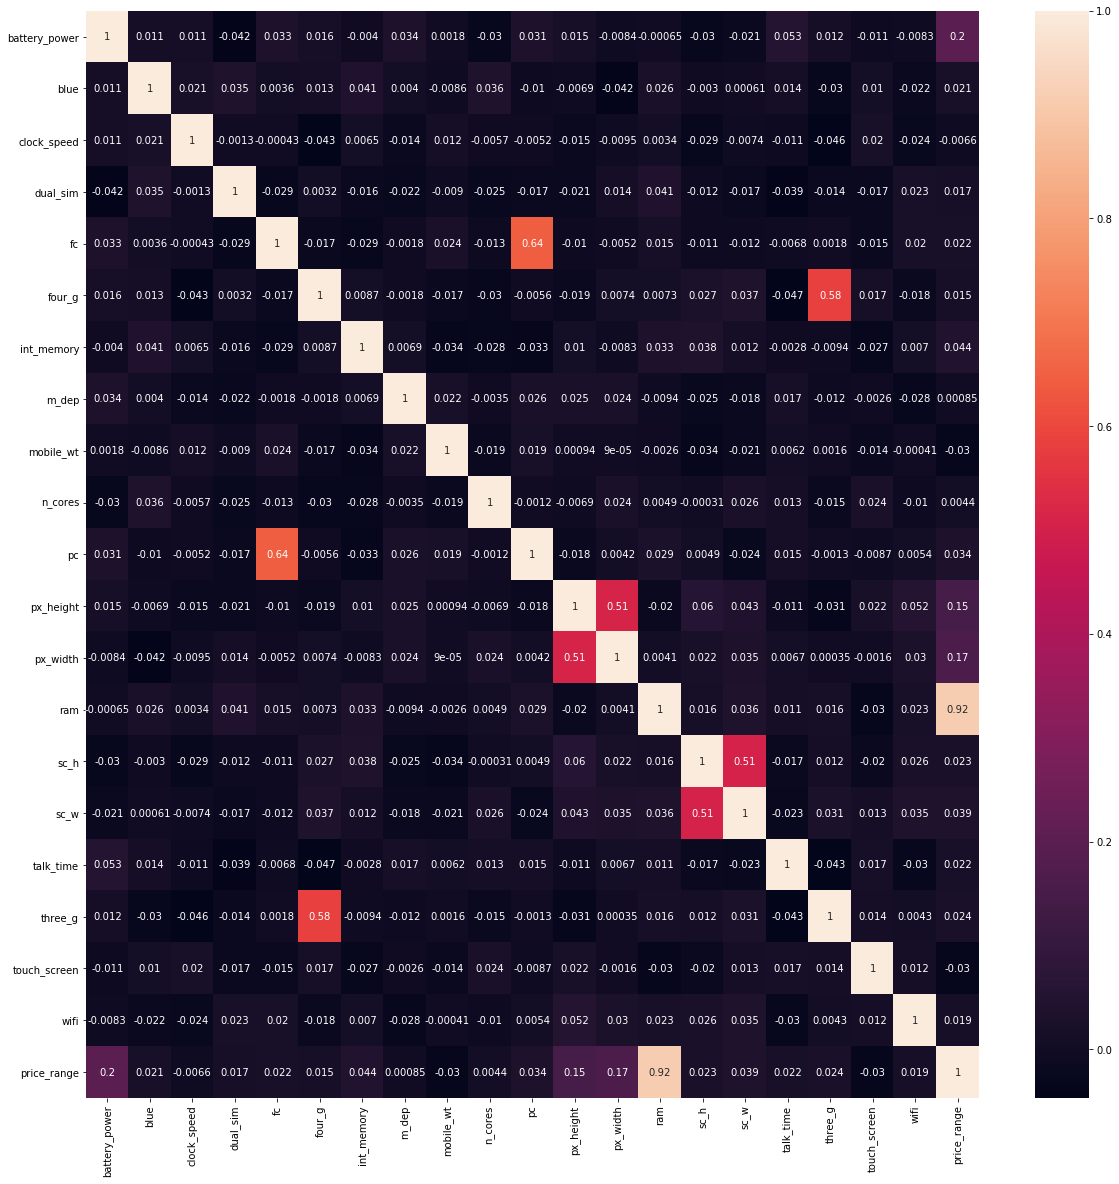

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_col = corr_matrix.columns
plt.figure(figsize=(20,20))
sns.heatmap(data[feature_col].corr(),annot=True)
plt.show()

In [ ]:
def correlation(data,thresold):
    

In [29]:
from sklearn.feature_selection import mutual_info_classif

In [30]:
mutual_info = mutual_info_classif(X,Y)

In [31]:
corr_score = pd.Series(mutual_info,index=X.columns).sort_values(ascending=False)
corr_score

ram              0.850938
px_width         0.031022
px_height        0.029470
battery_power    0.027370
n_cores          0.019492
dual_sim         0.016588
touch_screen     0.009663
wifi             0.008157
mobile_wt        0.007683
three_g          0.005220
sc_w             0.003175
clock_speed      0.002903
pc               0.001613
sc_h             0.000000
talk_time        0.000000
m_dep            0.000000
int_memory       0.000000
four_g           0.000000
fc               0.000000
blue             0.000000
dtype: float64

In [32]:
corr_score.nlargest(10)

ram              0.850938
px_width         0.031022
px_height        0.029470
battery_power    0.027370
n_cores          0.019492
dual_sim         0.016588
touch_screen     0.009663
wifi             0.008157
mobile_wt        0.007683
three_g          0.005220
dtype: float64

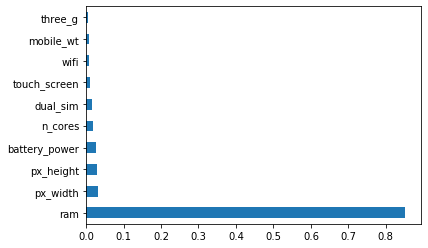

In [35]:
corr_score.nlargest(10).plot(kind="barh")